In [28]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 3

@author: yaning
"""

import importlib
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math

# my own class files
import threshold.Receptors as Receptors

In [29]:
importlib.reload(Receptors)

<module 'threshold.Receptors' from '/home/yaning/Documents/Spiking_NN/threshold/Receptors.py'>

In [55]:
pointCount = 6000
deltaTms = 0.05
times = np.arange(pointCount) * deltaTms
initial_Vm = 1.3458754117369027
Vm = initial_Vm
Cm = 1

In [56]:
sodium_channel = Receptors.Voltage_Sodium(initial_Vm)
potassium_channel = Receptors.Voltage_Potassium(initial_Vm)
leaky_channel = Receptors.Voltage_Leak(initial_Vm)

In [10]:
ampa_receptor = Receptors.AMPA(0.072, 1, 70, 1.35, 1, 0.8, 1, 1, 12, 10, 20, 10, 8, 10, 0.7, "AMPA")

In [11]:
ampa_receptor.current()

-4.9428

In [13]:
sodium_channel.current()

np.float64(-8.219963456165412e-05)

In [57]:
voltages = []
stim = np.zeros(pointCount)
stim[2000:2020] = 12
for i in range(pointCount):

    sodium_channel.update_gP(deltaTms)
    potassium_channel.update_gP(deltaTms)
    leaky_channel.update_gP(deltaTms)

    Ina = sodium_channel.current()
    Ik = potassium_channel.current()
    Ileak = leaky_channel.current()


    Isum = -Ina - Ik - Ileak 
    Vm +=  deltaTms * Isum / Cm
    if i == 2000:
        Vm = 1

    voltages.append(Vm)

    sodium_channel.Vm = Vm
    potassium_channel.Vm = Vm
    leaky_channel.Vm = Vm


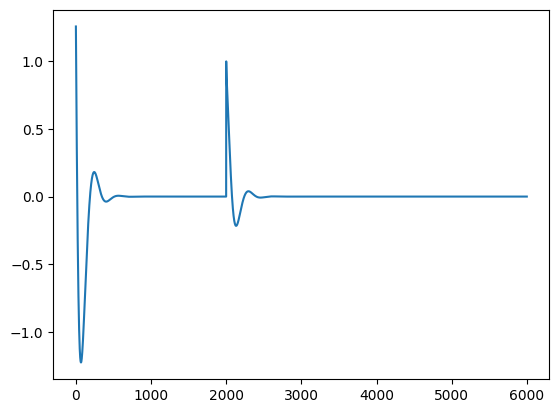

In [58]:
plt.plot(voltages)